In [1]:
import pandas as pd

# Load the dataset to examine its structure
data = pd.read_csv('Crop_recommendation.csv')

# Display the first few rows of the dataset to understand its structure
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
#Crop Prediction
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Separate features and target variable
X = data.drop('label', axis=1)
y = data['label']

# Encode the target variable (crop labels) to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Initialize and train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display evaluation metrics
accuracy, report


(0.990909090909091,
 '              precision    recall  f1-score   support\n\n       apple       1.00      1.00      1.00        34\n      banana       1.00      1.00      1.00        26\n   blackgram       1.00      1.00      1.00        26\n    chickpea       1.00      1.00      1.00        34\n     coconut       1.00      1.00      1.00        33\n      coffee       1.00      1.00      1.00        30\n      cotton       1.00      1.00      1.00        28\n      grapes       1.00      1.00      1.00        23\n        jute       0.85      1.00      0.92        34\n kidneybeans       1.00      1.00      1.00        36\n      lentil       1.00      1.00      1.00        22\n       maize       1.00      1.00      1.00        26\n       mango       1.00      1.00      1.00        32\n   mothbeans       1.00      1.00      1.00        34\n    mungbean       1.00      1.00      1.00        30\n   muskmelon       1.00      1.00      1.00        24\n      orange       1.00      1.00      1.

In [ ]:
#Financial Analysis
# Add average yield (quintals/hectare) and market price (per quintal) for crops
crop_data = {
    'crop': label_encoder.classes_,
    'average_yield': [20, 18, 25, 22, 15, 24, 30, 35, 20, 18, 27, 25, 22, 17, 26, 23, 28, 21, 30, 24, 32, 35],  # Example values
    'market_price': [1500, 1800, 2000, 1750, 2200, 1400, 1600, 1900, 1300, 1850, 1550, 1700, 1950, 1250, 1450, 1650, 1850, 2100, 2000, 2300, 2500, 2400]  # Example prices
}
crop_df = pd.DataFrame(crop_data)

# Simulated input cost per hectare
input_costs = {
    'seed_cost': 5000,
    'fertilizer_cost': 3000,
    'labor_cost': 4000,
    'irrigation_cost': 2000
}

# Calculate profit margin for each crop prediction
predicted_crops = label_encoder.inverse_transform(y_pred)
financial_analysis = []

for crop in predicted_crops:
    crop_info = crop_df[crop_df['crop'] == crop].iloc[0]
    total_cost = sum(input_costs.values())
    expected_yield = crop_info['average_yield']  # Use average yield
    revenue = expected_yield * crop_info['market_price']
    profit = revenue - total_cost
    financial_analysis.append({
        'Crop': crop,
        'Expected Yield (quintals)': expected_yield,
        'Market Price (per quintal)': crop_info['market_price'],
        'Total Cost': total_cost,
        'Revenue': revenue,
        'Profit': profit
    })

# Convert to DataFrame for display
financial_df = pd.DataFrame(financial_analysis)

# Display the financial analysis DataFrame
print(financial_df)

# Save the financial analysis to a CSV file
financial_df.to_csv('financial_analysis_report.csv', index=False)
print("Financial analysis report saved as 'financial_analysis_report.csv'")



            Crop  Expected Yield (quintals)  Market Price (per quintal)  \
0      muskmelon                         23                        1650   
1     watermelon                         35                        2400   
2         papaya                         21                        2100   
3         papaya                         21                        2100   
4          apple                         20                        1500   
..           ...                        ...                         ...   
655  kidneybeans                         18                        1850   
656    mothbeans                         17                        1250   
657       papaya                         21                        2100   
658     chickpea                         22                        1750   
659   watermelon                         35                        2400   

     Total Cost  Revenue  Profit  
0         14000    37950   23950  
1         14000    84000   70

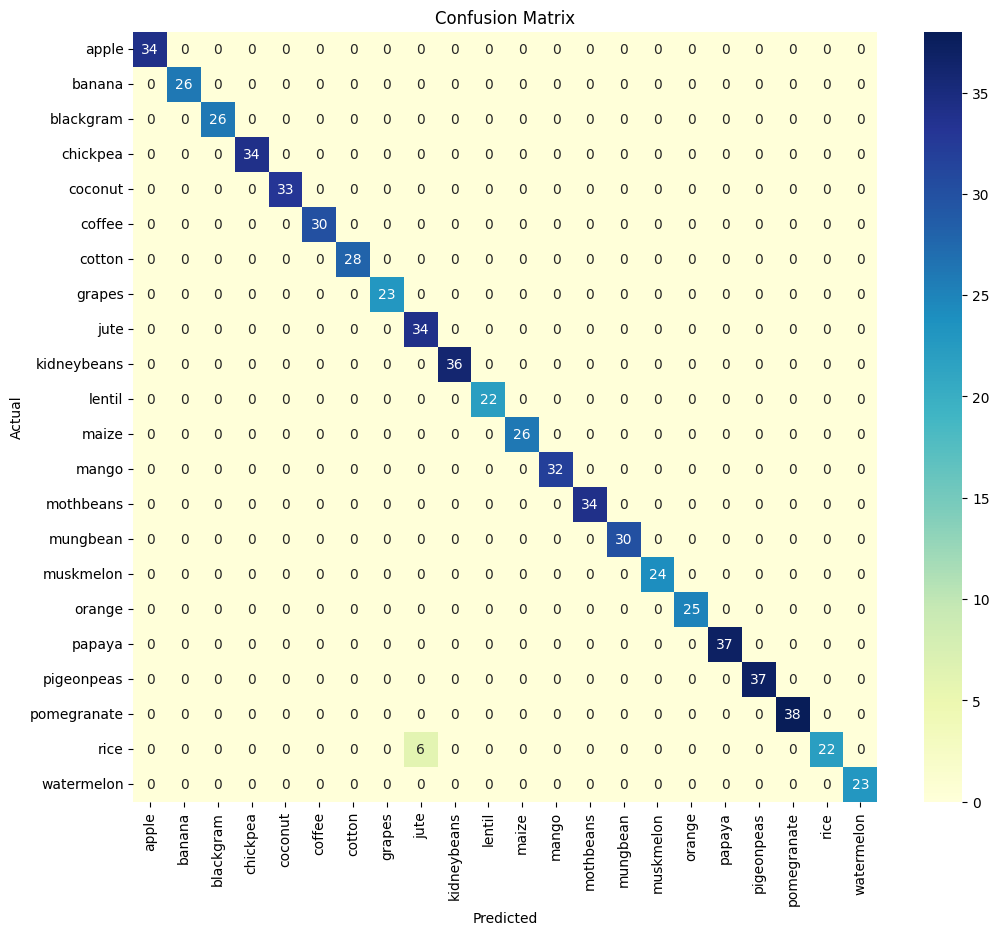

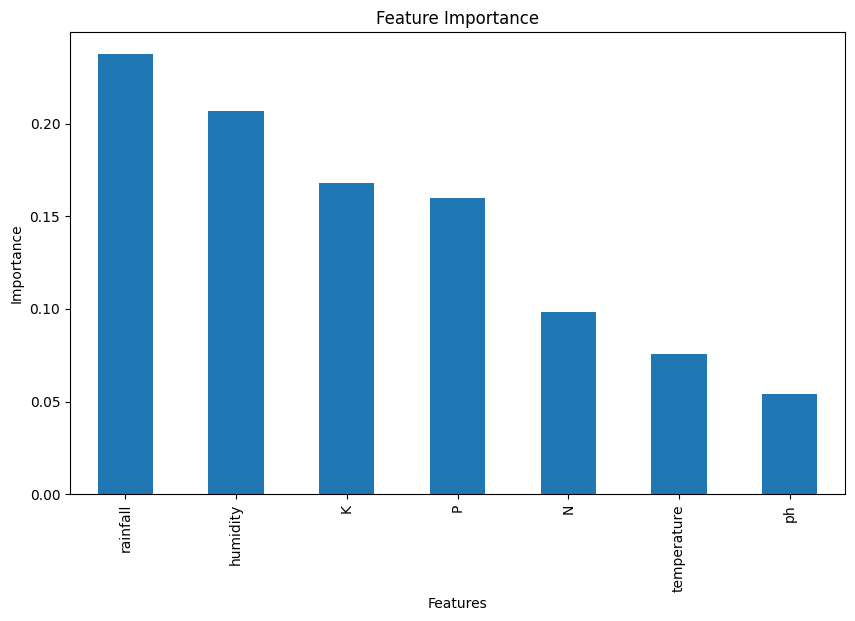

,Feature,Importance
6,rainfall,0.237409
4,humidity,0.206679
2,K,0.168173
1,P,0.159859
0,N,0.098293
3,temperature,0.075658
5,ph,0.053930


In [3]:
# Visualize the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Analyze feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
feature_importances.plot(kind='bar', x='Feature', y='Importance', legend=False, figsize=(10, 6), title='Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

feature_importances


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: C:\Users\sayan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [16]:
#Resource Management
import numpy as np

# Define thresholds for irrigation and nutrients
resource_thresholds = {
    'Moisture (%)': 30,  # Single value threshold for soil moisture
    'N': (20, 50),       # Nitrogen levels in kg/ha
    'P': (15, 40),       # Phosphorus levels in kg/ha
    'K': (15, 60),       # Potassium levels in kg/ha
    'ph': (6.0, 7.5)     # Soil pH range
}

# Simulate soil moisture values to match the DataFrame length
crop_data['Moisture (%)'] = np.random.randint(20, 40, size=len(crop_data))  # Simulated moisture values

# Function to analyze resource needs
def manage_resources(row):
    recommendations = []
    
    # Check for irrigation needs
    if row['Moisture (%)'] < resource_thresholds['Moisture (%)']:
        recommendations.append("Irrigation needed to increase soil moisture.")
    
    # Check for nutrient adjustments
    for nutrient, threshold in resource_thresholds.items():
        if isinstance(threshold, tuple):  # Handle range thresholds
            low, high = threshold
            if row[nutrient] < low:
                recommendations.append(f"Increase {nutrient} using appropriate fertilizer.")
            elif row[nutrient] > high:
                recommendations.append(f"Reduce {nutrient} application.")
    
    return recommendations

# Apply the function to the dataset
crop_data['Resource Recommendations'] = crop_data.apply(manage_resources, axis=1)

# Display the results
crop_data[['label', 'Moisture (%)', 'N', 'P', 'K', 'ph', 'Resource Recommendations']].head()

# Optionally, save to a CSV file
crop_data.to_csv('resource_management_analysis.csv', index=False)
print("Resource management analysis saved as 'resource_management_analysis.csv'.")

crop_data[['label', 'Moisture (%)', 'N', 'P', 'K', 'ph', 'Resource Recommendations']].head()




Resource management analysis saved as 'resource_management_analysis.csv'.


,label,Moisture (%),N,P,K,ph,Resource Recommendations
0,rice,21,90,42,43,6.502985,"[Irrigation needed to increase soil moisture.,..."
1,rice,20,85,58,41,7.038096,"[Irrigation needed to increase soil moisture.,..."
2,rice,38,60,55,44,7.840207,"[Reduce N application., Reduce P application.,..."
3,rice,31,74,35,40,6.980401,[Reduce N application.]
4,rice,26,78,42,42,7.628473,"[Irrigation needed to increase soil moisture.,..."


In [ ]:
#Soil Health And Fertility Monitoring With Crop Recommendations
crop_data = pd.read_csv('Crop_recommendation.csv')

# Analyze soil health and fertility using the crop recommendation dataset
# Select relevant soil and environmental columns
soil_data = crop_data[['ph', 'N', 'P', 'K']]
soil_data['Moisture (%)'] = [30] * len(soil_data)  # Simulating constant moisture for now

# Define ideal conditions for soil health (example values)
ideal_conditions = {
    'ph': (6.0, 7.5),  # Ideal pH range
    'Moisture (%)': (25, 50),  # Ideal moisture range
    'N': (20, 50),  # Nitrogen levels in kg/ha
    'P': (15, 40),  # Phosphorus levels in kg/ha
    'K': (15, 60)   # Potassium levels in kg/ha
}

# Function to analyze soil health and provide recommendations
def analyze_soil_health(row):
    recommendations = []
    for nutrient, (low, high) in ideal_conditions.items():
        if row[nutrient] < low:
            recommendations.append(f"Increase {nutrient}")
        elif row[nutrient] > high:
            recommendations.append(f"Reduce {nutrient}")
    return recommendations

# Apply the soil analysis function
soil_data['Recommendations'] = soil_data.apply(analyze_soil_health, axis=1)

# Add crop labels to the soil data for context
soil_data['Crop'] = crop_data['label']

# Save the soil health analysis with crop context to a CSV file
soil_data.to_csv('soil_health_analysis.csv', index=False)

# Print the first few rows of the data for verification
print(soil_data.head())

print("Soil health analysis saved as 'soil_health_analysis.csv'.")



         ph   N   P   K  Moisture (%)                  Recommendations  Crop
0  6.502985  90  42  43            30             [Reduce N, Reduce P]  rice
1  7.038096  85  58  41            30             [Reduce N, Reduce P]  rice
2  7.840207  60  55  44            30  [Reduce ph, Reduce N, Reduce P]  rice
3  6.980401  74  35  40            30                       [Reduce N]  rice
4  7.628473  78  42  42            30  [Reduce ph, Reduce N, Reduce P]  rice
Soil health analysis saved as 'soil_health_analysis.csv'.


C:\Users\sayan\AppData\Local\Temp\ipykernel_27296\2717668788.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soil_data['Moisture (%)'] = [30] * len(soil_data)  # Simulating constant moisture for now
C:\Users\sayan\AppData\Local\Temp\ipykernel_27296\2717668788.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soil_data['Recommendations'] = soil_data.apply(analyze_soil_health, axis=1)
C:\Users\sayan\AppData\Local\Temp\ipykernel_27296\2717668788.py:33: SettingWithCopyWarning: 
A value is trying to be se